In [107]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: c:\users\rahul m\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip


In [108]:
import pandas as pd
df=pd.read_csv('sales_prediction.csv')

In [109]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [110]:
X=df.drop(columns=['Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

SEED=42

In [111]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: c:\users\rahul m\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip


In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
X_train.shape, X_test.shape

((5966, 11), (2557, 11))

In [113]:
X_train.head(3)
X_train.select_dtypes(include=['object'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
5734,FDY08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
5191,FDC41,Low Fat,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1
5390,NCQ53,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
860,FDL46,low fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [114]:
y_train.head(3)

1921     117.8466
655     1230.3984
2229    4933.5780
Name: Item_Outlet_Sales, dtype: float64

In [115]:
X_train_c=X_train.copy()


In [116]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [117]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [118]:
num_data=X_train_c.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [119]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [120]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [121]:
pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: c:\users\rahul m\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip


In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

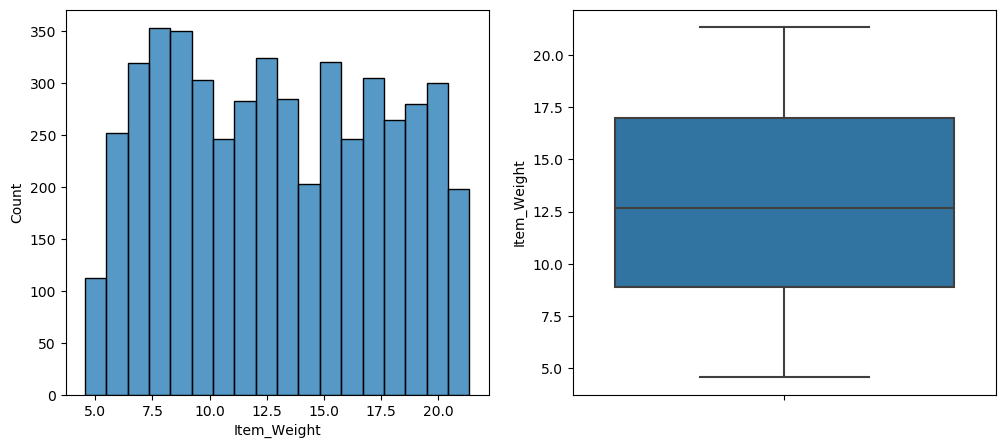

In [123]:
fig, ax= plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=X_train_c, x='Item_Weight', ax=ax[0]);
sns.boxplot(data=X_train_c, y='Item_Weight', ax=ax[1]);

In [124]:
def visualize_numeric_feature(data_frame, col_name):
    fig, ax= plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data=data_frame, x=col_name, ax=ax[0]);
    sns.boxplot(data=data_frame, y=col_name, ax=ax[1]);

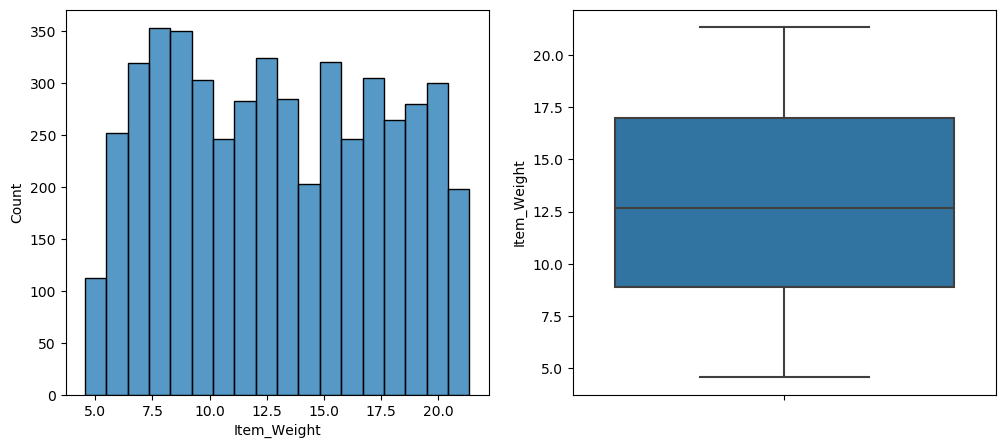

In [125]:
visualize_numeric_feature(X_train_c, 'Item_Weight')

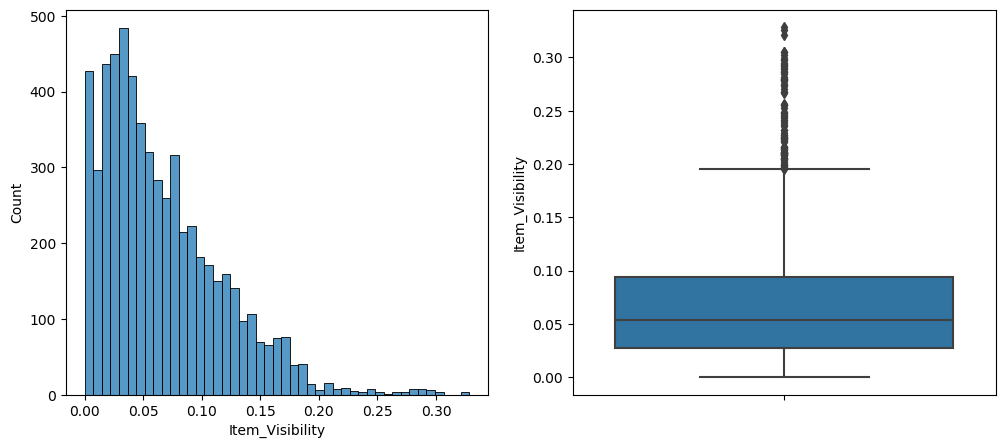

In [126]:
visualize_numeric_feature(X_train_c,'Item_Visibility')

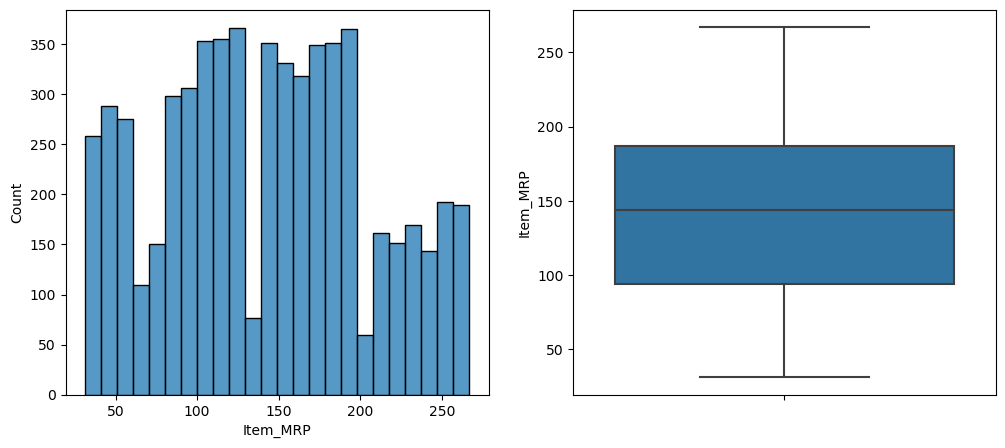

In [127]:
visualize_numeric_feature(X_train_c,'Item_MRP')

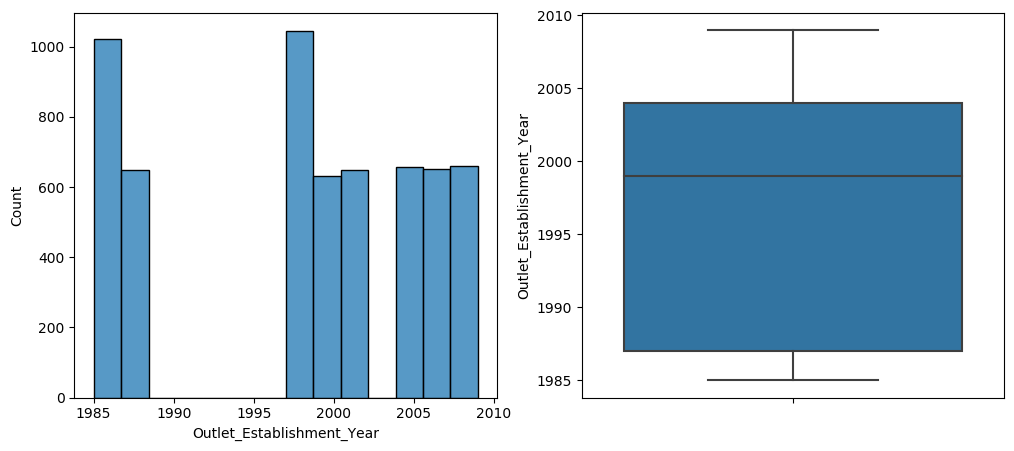

In [128]:
visualize_numeric_feature(X_train_c,'Outlet_Establishment_Year')

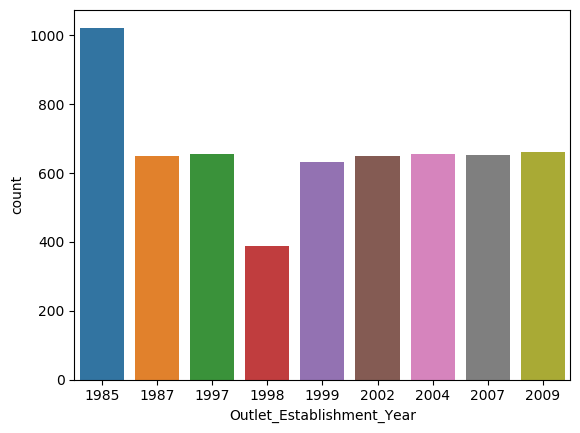

In [129]:
sns.countplot(data=X_train_c,x='Outlet_Establishment_Year')

In [130]:
cat_features=X_train_c.select_dtypes(include=['object'])
cat_features.head()


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [131]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [132]:
cat_features['Item_Identifier'].value_counts()

NCI54    9
FDF52    9
FDV60    8
DRE49    8
NCI29    8
        ..
NCR54    1
NCU06    1
FDG28    1
FDN51    1
FDV56    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [133]:
cat_features['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [134]:
cat_features['Item_Type'].value_counts()

Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64

In [135]:
cat_features['Outlet_Identifier'].value_counts()

OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT013    649
OUT045    649
OUT049    631
OUT010    389
OUT019    355
Name: Outlet_Identifier, dtype: int64

In [136]:
cat_features['Outlet_Size'].value_counts()

Medium    1960
Small     1667
High       649
Name: Outlet_Size, dtype: int64

In [137]:
cat_features['Outlet_Location_Type'].value_counts()

Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: Outlet_Location_Type, dtype: int64

In [138]:
cat_features['Outlet_Type'].value_counts()

Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: Outlet_Type, dtype: int64

In [139]:
#Data wrangling + features engineering
#step1 : create high level item types
X_train_c['Item_Identifier'].apply(lambda x: x[:2]).value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [140]:
X_train_c['Item_Identifier'].str[:2].value_counts()
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Snack Foods,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Frozen Foods,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [141]:
#step 1:map item ids to item types
def create_item_type(data_frame):
    data_frame['Item_Type']=data_frame['Item_Identifier'].str[:2]
    data_frame['Item_Type']=data_frame['Item_Type'].map({
        'FD':'Food',
         'NC':'Non_Consumable',
        'DR':'Drink'
    })
    return data_frame
    


In [142]:
X_train_c=create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [143]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [144]:
#step 2: fill in missing values for Item_weight
X_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [145]:
X_train_c[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_Consumable,12.600
6191,Non_Consumable,8.880
1911,Non_Consumable,19.850
135,Non_Consumable,7.235


In [146]:
X_train_c.pivot_table(values='Item_Weight',index='Item_Identifier').reset_index()

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1517,NCZ30,6.590
1518,NCZ41,19.850
1519,NCZ42,10.500
1520,NCZ53,9.600


In [147]:
#step 2: fill in missing vallues for Item_weight
#logic
#1st step:Use mapping of item ID -weight and fill in missing values
#2nd step: if completely new item
#i.e item ID not in test \live data use item type - median(weight) and fill in missing values
ITEM_ID_WEIGHT_PIVOT=X_train_c.pivot_table(values='Item_Weight',index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'],ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [148]:
ITEM_TYPE_WEIGHT_PIVOT=X_train_c.pivot_table(values='Item_Weight',index='Item_Type',
                                             aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'],ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()

dict_items([('Drink', 11.8), ('Food', 12.8), ('Non_Consumable', 13.05)])

In [149]:
def impute_item_weight(data_frame):
    #1st logic item id- weight
    data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
    #2nd logic item type-weight if any still missing
    data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))
    return data_frame

In [150]:
X_train_c=impute_item_weight(X_train_c)
X_train_c.info()
X_train_c.isnull().sum()
X_train_c


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 719.3+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.720,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.750,Low Fat,0.014301,Non_Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,8.600,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.350,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.350,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Food,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store
5191,FDC41,15.600,Low Fat,0.117575,Food,75.6670,OUT017,2007,NaN,Tier 2,Supermarket Type1
5390,NCQ53,17.600,Low Fat,0.018944,Non_Consumable,237.3590,OUT045,2002,NaN,Tier 2,Supermarket Type1
860,FDL46,20.350,low fat,0.054363,Food,117.9466,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [151]:
#step 3 :Fill in missing values for outlet_size
X_train_c.groupby(by=['Outlet_Type','Outlet_Size']).size()


Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [152]:
#step 3: Impute missing values for Outlet_Size
#logic :
from scipy.stats import mode 
OUTLET_TYPE_SIZE_PIVOT=X_train_c.pivot_table(values='Outlet_Size',index='Outlet_Type',
                                            aggfunc=(lambda x : mode(x).mode[0])).reset_index()
OUTLET_TYPE_SIZE_MAPPING=dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'],OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
OUTLET_TYPE_SIZE_MAPPING

{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [153]:
X_train_c.pivot_table(values='Outlet_Size',index='Outlet_Type',
                    aggfunc=(lambda x : mode(x).mode[0])).reset_index()

,Outlet_Type,Outlet_Size
0,Grocery Store,Small
1,Supermarket Type1,Small
2,Supermarket Type2,Medium
3,Supermarket Type3,Medium


In [154]:
def impute_outlet_size(data_frame):
    #1st logic Outlet_Type -mode(Outlet_Size)
    data_frame.loc[:,'Outlet_Size']=data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))
    return data_frame

In [155]:
X_train_c=impute_outlet_size(X_train_c)
X_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [156]:
#step 4: standardize item_fat_content categories consists
def standardize_item_fat_content(data_frame):
    data_frame['Item_Fat_Content']=data_frame['Item_Fat_Content'].replace({
        'Low Fat' : 'Low_Fat',
        'LF': 'Low_Fat',
        'reg':'Regular',
        'low fat':'Low_Fat'
    })
    return data_frame

In [157]:
X_train_c=standardize_item_fat_content(X_train_c)
X_train_c['Item_Fat_Content'].value_counts()

Low_Fat    3860
Regular    2106
Name: Item_Fat_Content, dtype: int64

In [158]:
#step 5: Correct item fat content for non-consumables
X_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non_Consumable  Low_Fat             1137
dtype: int64

In [159]:
X_train_c.loc[X_train_c['Item_Type']=='Non_Consumables', 'Item_Fat_Content']

Series([], Name: Item_Fat_Content, dtype: object)

In [160]:
#step 5 : correct item fat content for non-consumables
def correct_item_fat_content(data_frame):
    data_frame.loc[data_frame['Item_Type']=='Non_Consumable','Item_Fat_Content']='Non_Edible'
    return data_frame

In [161]:
X_train_c= correct_item_fat_content(X_train_c)
X_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non_Consumable  Non_Edible          1137
dtype: int64

In [162]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 719.3+ KB


In [163]:
#prepare datasets for ML
def prepare_dataset(data_frame):
    
    #step 1 : Create Item type
    data_frame=create_item_type(data_frame)
    #step 2: fill in the missing values for Item_weight
    data_frame= impute_item_weight(data_frame)
    #step 3: Impute missing values for Outlet_Size
    data_frame= impute_outlet_size(data_frame)
    #step 4: make item fat content categories consistent
    dataframe= standardize_item_fat_content(data_frame)
    #step 5 : correct item fat content for non-consumable
    dataframe= correct_item_fat_content(data_frame)
    return data_frame


In [164]:

X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [165]:
X_train=prepare_dataset(X_train)
X_train.isnull().sum()
X_test=prepare_dataset(X_test)

In [166]:
#hadling categorical daa
#Expt1 : all categorical columns - one hot encoded
cat_feats=X_train.select_dtypes(include=['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non_Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [167]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: c:\users\rahul m\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip


In [168]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [169]:
ohe_feature_names= ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_names



array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [170]:
num_feats_train=X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [171]:
cat_feats_train=X_train.select_dtypes(include=['object'])
X_train_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_cat_ohe.head()


,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [172]:
X_train_final=pd.concat([num_feats_train,X_train_cat_ohe],axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [173]:
final_columns=X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [174]:
import pandas as pd
num_feats_test=X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test=X_test.select_dtypes(include=['object'])
X_test_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_test).toarray(),columns=ohe_feature_names)
X_test_final=pd.concat([num_feats_test,X_test_cat_ohe],axis=1)
X_test_final=X_test_final[final_columns]

X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


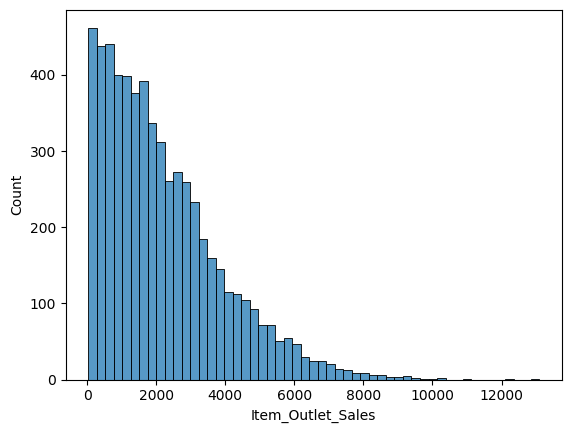

In [175]:
#MODELLING
sns.histplot(y_train)

In [176]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: c:\users\rahul m\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip


In [177]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: c:\users\rahul m\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip


In [178]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np

In [179]:
def train_and_eval_model(model,X_train,y_train,cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2', 'neg_root_mean_squared_error'),)
    print('Model:', model)
    r2_scores=cv_results['test_r2']
    print('R2 CV scores:', r2_scores)
    print('R2 CV scores mean / stdev:', np.mean(r2_scores),'/', np.std(r2_scores))
    
    rmse_scores = cv_results['test_neg_root_mean_squared_error']
    rmse_scores = [-1*score for score in rmse_scores]
    print('RMSE CV scores:',rmse_scores)
    print('RMSE CV scores mean / stdev:', np.mean(rmse_scores), '/',np.std(rmse_scores))

In [180]:
rf=RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf, X_train=X_train_final, y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.56794565 0.52724597 0.54484453 0.55644237 0.52216906]
R2 CV scores mean / stdev: 0.5437295173552796 / 0.017238571152678784
RMSE CV scores: [1107.4836866900885, 1167.9402885518593, 1177.9758766080945, 1151.5496064300767, 1199.5860972729831]
RMSE CV scores mean / stdev: 1160.9071111106205 / 30.91438979419988


In [181]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,X_train=X_train_final,y_train=y_train)


Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60673236 0.59366925 0.57356358 0.6092354  0.55008652]
R2 CV scores mean / stdev: 0.5866574231598927 / 0.022229773426352257
RMSE CV scores: [1056.604002395134, 1082.786581771003, 1140.2068860094903, 1080.8495081206938, 1164.0155809664416]
RMSE CV scores mean / stdev: 1104.8925118525526 / 40.351358446480106


In [182]:
hb=HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hb,X_train=X_train_final,y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.5817321  0.54526329 0.54624344 0.58282443 0.54567103]
R2 CV scores mean / stdev: 0.5603468571993191 / 0.01791295765714688
RMSE CV scores: [1089.6710597749257, 1145.4681811517275, 1176.1642443119038, 1116.7785328953212, 1169.713511250089]
RMSE CV scores mean / stdev: 1139.5591058767936 / 32.53279312663371


In [183]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_final,y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=42,
             reg_alpha=None, reg_lambda=None, ...)
R2 CV scores: [0.57766545 0.55385219 0.55544925 0.58722341 0.52691616]
R2 CV scores mean / stdev: 0.5602212911784988 / 0.021004678765331467
RMSE CV scores: [1094.9554601203774, 1134.5990151909684, 1164.1721103377884, 1110.8749017984524, 1193.6124678645144]
RMSE CV 

In [184]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_final,y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of 

In [185]:
#handling categorical data
#expt 2 : all categorical columns - native handling
X_train_copy=X_train.copy().drop(columns='Item_Identifier')
cat_cols= X_train_copy.select_dtypes(include=['object']).columns.tolist()
num_cols=cal_cols =X_train_copy.select_dtypes(exclude=['object']).columns.tolist()
cat_cols,num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [186]:
X_train_copy[cat_cols]=X_train_copy[cat_cols].astype('category')
n_categorical_features=len(cat_cols)
n_numerical_features=len(num_cols)
X_train_copy=X_train_copy[cat_cols+num_cols]

X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                5966 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.0 KB


In [187]:
categorical_mask=[True]*n_categorical_features+[False]*n_numerical_features
categorical_mask

[True, True, True, True, True, True, False, False, False, False]

In [188]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

categorical_mask=[True]*n_categorical_features+[False]*n_numerical_features
ordinal_encoder=make_column_transformer(
    (
      OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
       make_column_selector(dtype_include="category"),
    ),
     remainder="passthrough",
)
hgb = make_pipeline(
   ordinal_encoder,
   HistGradientBoostingRegressor(
       random_state=42, categorical_features=categorical_mask
    ),
    
)
train_and_eval_model(model=hgb,X_train=X_train_copy,y_train=y_train)

Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B2DA99D278>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                     

In [189]:
#handling categorical data
#expt 3 : no item identifier - one hot encoded
X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier']).head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,Non_Edible,Non_Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [190]:
cat_feats= X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_name=ohe.get_feature_names_out(input_features=cat_feats.columns)

In [201]:
cat_feats_train.shape
#X_train_cat_ohe.shape

(5966, 6)

In [193]:
num_feats_train=X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train=X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_final=pd.concat([num_feats_train,X_train_cat_ohe],axis=1)

X_train_final.head()

ValueError: Shape of passed values is (5966, 26), indices imply (5966, 1569)

In [ ]:
gb=GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(Model=gb, X_train=X_train_final, y_train=y_train)

In [ ]:
hb=HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hb,X_train=X_train_final,y_train=y_train)

In [ ]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_final,y_train=y_train)

In [ ]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_final,y_train=y_train)

In [192]:
from sklearn.feature_extraction import FeatureHasher
hash_vector_size=50
fh=FeatureHasher(n_feature=hash_vector_size,input_type='string')
hashed_df=pd.DataFrame(fh.transform(X_train['Item_Identifier']).toarray(),
                      columns=['H'+str(i) for i in range(hash_vector_size)])
hashed_df.head()

TypeError: __init__() got an unexpected keyword argument 'n_feature'